In [1]:
library(Rtsne)

Warning message:
"package 'Rtsne' was built under R version 3.6.1"

In [2]:
set.seed(1)

In [42]:
data <- read.csv(file="tempsensor_data_sim_sensors_15.csv", header=TRUE, sep=",")

In [67]:
head(data,5)
tail(data,1)

,Temp_1_1,Temp_1_2,Temp_1_3,Temp_1_4,Temp_2_1,Temp_2_2,Temp_2_3,Temp_2_4,Temp_12_avg_open,Temp_12_avg_close,Temp_3_1,Temp_3_2,Temp_3_3,Temp_3_4,Temp_4_1,Temp_4_2,Temp_4_3,Temp_4_4,Temp_34_avg_open,Temp_34_avg_close
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,26.812,27.000,26.250,26.750,27.125,27.187,26.688,27.125,26.9685,26.9375,24.937,25.562,24.188,24.937,25.687,26.063,24.750,25.625,25.312,25.2810
23,26.812,27.062,26.312,26.375,27.125,27.187,26.375,26.375,26.9685,26.3750,25.187,25.812,24.312,25.750,25.187,26.125,25.062,25.625,25.187,25.6875
24,27.000,27.062,26.250,26.812,26.562,27.187,26.562,26.875,26.7810,26.8435,25.187,25.812,24.312,25.750,25.187,26.125,25.062,25.625,25.187,25.6875
25,27.000,27.062,26.250,26.812,26.562,27.187,26.562,26.875,26.7810,26.8435,25.562,25.750,24.687,25.062,25.500,26.312,24.875,25.750,25.531,25.4060
26,26.625,27.437,25.937,26.875,26.312,27.625,26.250,27.625,26.4685,27.2500,24.250,27.000,24.250,27.000,25.438,27.687,25.312,27.687,24.844,27.3435


,Temp_1_1,Temp_1_2,Temp_1_3,Temp_1_4,Temp_2_1,Temp_2_2,Temp_2_3,Temp_2_4,Temp_12_avg_open,Temp_12_avg_close,Temp_3_1,Temp_3_2,Temp_3_3,Temp_3_4,Temp_4_1,Temp_4_2,Temp_4_3,Temp_4_4,Temp_34_avg_open,Temp_34_avg_close
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,25.812,26.312,25.687,25.687,25.438,26.125,25.187,25.687,25.625,25.687,24.25,24.75,22.812,23.875,25.062,25.312,23.687,24,24.656,23.9375


In [68]:
head(data_t)

,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
Temp_1_1,26.812,27.000,27.000,26.625,27.500,27.500,27.500,27.500,27.500,28.312,28.312,28.437,28.437,28.250,28.250,27.125,27.125,26.250,26.250,25.812
Temp_1_2,27.062,27.062,27.062,27.437,27.938,28.312,28.312,28.312,28.312,28.563,28.563,28.437,28.437,28.375,28.375,27.125,27.125,26.500,26.500,26.312
Temp_1_3,26.312,26.250,26.250,25.937,27.125,27.500,27.500,27.500,27.500,28.000,28.000,27.562,27.562,26.750,26.750,25.687,25.687,25.687,25.687,25.687
Temp_1_4,26.375,26.812,26.812,26.875,27.938,28.312,28.312,28.312,28.312,28.437,28.437,28.125,28.125,27.062,27.062,26.250,26.250,25.937,25.937,25.687
Temp_2_1,27.125,26.562,26.562,26.312,27.125,28.125,28.125,28.125,28.125,28.500,28.500,27.812,27.812,28.125,28.125,26.375,26.375,25.125,25.125,25.438
Temp_2_2,27.187,27.187,27.187,27.625,28.187,28.437,28.437,28.437,28.437,28.687,28.687,28.500,28.500,28.437,28.437,26.375,26.375,26.688,26.688,26.125


In [38]:
data=data[12:nrow(data),]

In [4]:
# data=data[,2:5]

In [44]:
data=data[,2:21]
data=data[11:nrow(data),]
data=data[11:nrow(data),]
data_t=t(data)

In [48]:
data_t=data_t[,3:ncol(data_t)]

In [49]:
dim(data_t)

[1] 20 20

In [22]:
head(data_t)

Temp_1_1,26.063,26.812,26.937,27.313,26.750,26.500,26.500,26.250,26.312,26.375,...,28.312,28.437,28.437,28.250,28.250,27.125,27.125,26.250,26.250,25.812
Temp_1_2,27.125,26.937,27.187,27.500,26.812,26.750,26.750,26.562,26.562,26.688,...,28.563,28.437,28.437,28.375,28.375,27.125,27.125,26.500,26.500,26.312
Temp_1_3,26.063,26.063,25.937,26.125,25.937,26.187,26.187,25.687,25.500,25.687,...,28.000,27.562,27.562,26.750,26.750,25.687,25.687,25.687,25.687,25.687
Temp_1_4,27.000,26.688,27.187,26.562,25.937,26.250,26.250,26.375,26.500,25.750,...,28.437,28.125,28.125,27.062,27.062,26.250,26.250,25.937,25.937,25.687
Temp_2_1,26.937,27.062,27.250,27.062,27.062,26.312,26.312,26.562,26.063,26.750,...,28.500,27.812,27.812,28.125,28.125,26.375,26.375,25.125,25.125,25.438
Temp_2_2,27.313,27.375,27.562,27.875,27.187,27.000,27.000,26.937,26.937,26.875,...,28.687,28.500,28.500,28.437,28.437,26.375,26.375,26.688,26.688,26.125


In [50]:
pca=princomp(data_t)

In [51]:
l=pca$loadings

In [52]:
l


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
23  0.244  0.135  0.154  0.261  0.389         0.219         0.160  0.234 
24  0.250  0.212  0.198         0.181         0.218 -0.185 -0.305  0.310 
25  0.249         0.184 -0.154  0.193 -0.256               -0.385 -0.266 
26  0.217  0.671 -0.351  0.173        -0.212  0.146 -0.212  0.238 -0.186 
27         0.128 -0.196 -0.267 -0.227         0.184  0.107 -0.337  0.413 
28               -0.254         0.194  0.338 -0.275                      
29               -0.376         0.188  0.194 -0.183               -0.110 
30               -0.340         0.226  0.119               -0.247        
31               -0.233 -0.305  0.206  0.133 -0.242  0.153               
32  0.144               -0.239  0.151        -0.150                      
33  0.202               -0.128        -0.441 -0.265  0.375  0.268        
34  0.175        -0.148        -0.275 -0.417         0.180 -0.134        
35  0.188 -0.121 -0.145 -0.

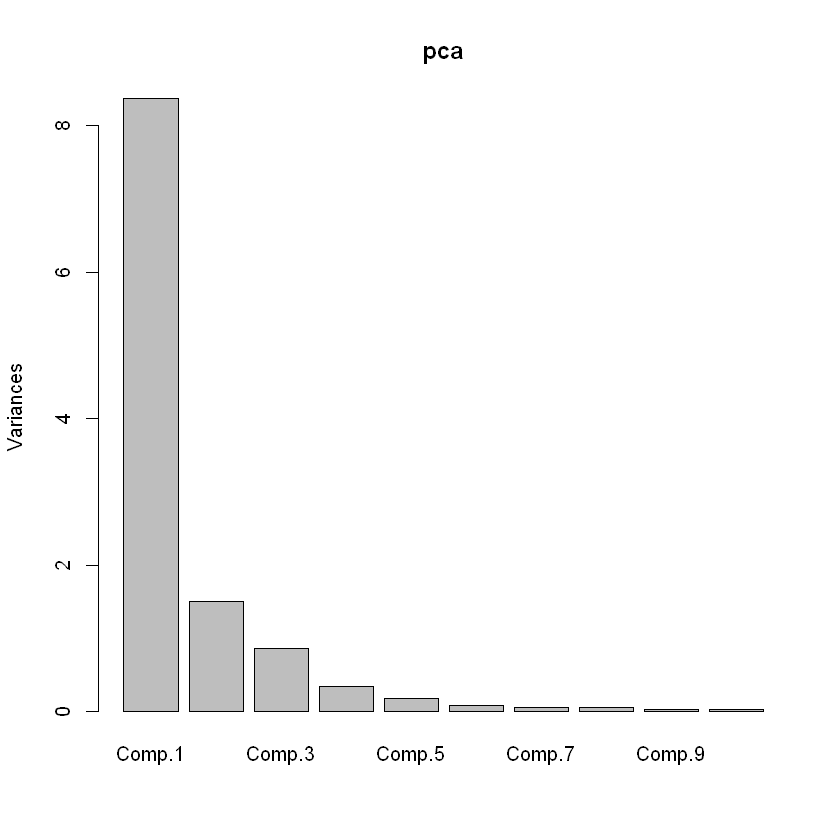

In [56]:
plot(pca)

In [59]:
Labels<-c('Temp_1_1', 'Temp_1_2', 'Temp_1_3', 'Temp_1_4' ,'Temp_2_1', 'Temp_2_2', 'Temp_2_3', 'Temp_2_4', 'Temp_12_avg_open' ,'Temp_12_avg_close' ,'Temp_3_1' ,'Temp_3_2' ,'Temp_3_3', 'Temp_3_4', 'Temp_4_1' ,'Temp_4_2', 'Temp_4_3' ,'Temp_4_4' ,'Temp_34_avg_open' ,'Temp_34_avg_close')

In [58]:
rownames(data_t)

[1] "Temp_1_1"          "Temp_1_2"          "Temp_1_3"         
 [4] "Temp_1_4"          "Temp_2_1"          "Temp_2_2"         
 [7] "Temp_2_3"          "Temp_2_4"          "Temp_12_avg_open" 
[10] "Temp_12_avg_close" "Temp_3_1"          "Temp_3_2"         
[13] "Temp_3_3"          "Temp_3_4"          "Temp_4_1"         
[16] "Temp_4_2"          "Temp_4_3"          "Temp_4_4"         
[19] "Temp_34_avg_open"  "Temp_34_avg_close"

In [111]:
unique(Labels)

[1] "Temp_1" "Temp_2" "Temp_3" "Temp_4"

In [60]:
color <- rainbow(length(unique(Labels)))
names(color) <- unique(Labels)

In [61]:
t=Rtsne(data_t,dim=2,perplexity =4)

In [119]:
names

function (x)  .Primitive("names")

In [65]:
color[Labels]

Temp_1_1          Temp_1_2          Temp_1_3          Temp_1_4 
      "#FF0000FF"       "#FF4D00FF"       "#FF9900FF"       "#FFE500FF" 
         Temp_2_1          Temp_2_2          Temp_2_3          Temp_2_4 
      "#CCFF00FF"       "#80FF00FF"       "#33FF00FF"       "#00FF19FF" 
 Temp_12_avg_open Temp_12_avg_close          Temp_3_1          Temp_3_2 
      "#00FF66FF"       "#00FFB2FF"       "#00FFFFFF"       "#00B3FFFF" 
         Temp_3_3          Temp_3_4          Temp_4_1          Temp_4_2 
      "#0066FFFF"       "#001AFFFF"       "#3300FFFF"       "#7F00FFFF" 
         Temp_4_3          Temp_4_4  Temp_34_avg_open Temp_34_avg_close 
      "#CC00FFFF"       "#FF00E6FF"       "#FF0099FF"       "#FF004DFF"

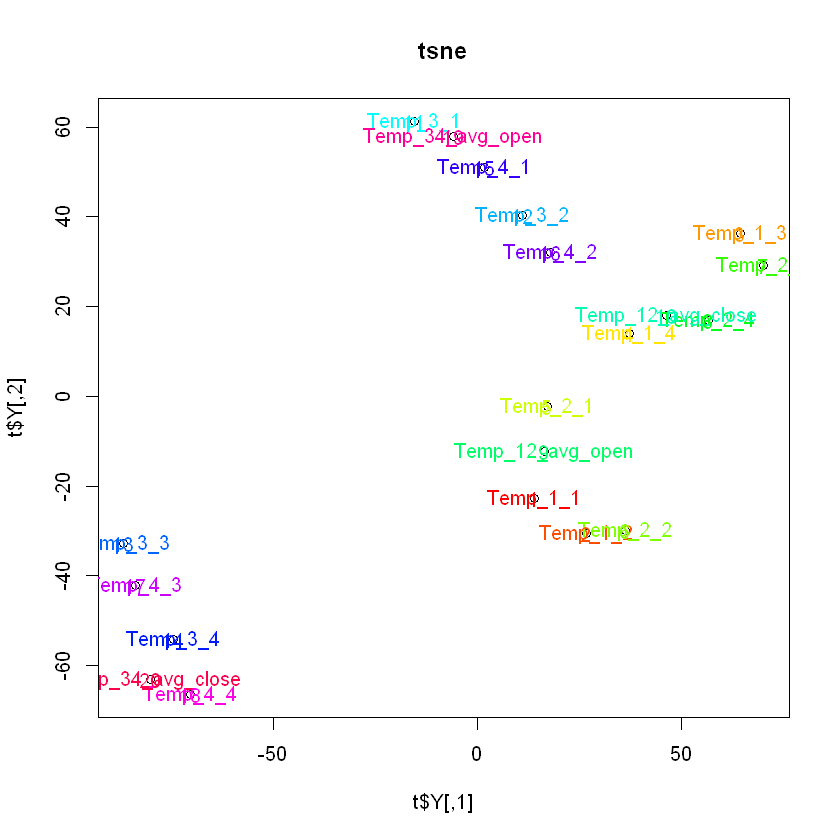

In [63]:
plot(t$Y,main="tsne")
text(t$Y, labels = Labels, col = color[Labels])
text(t$Y, col = color[Labels])

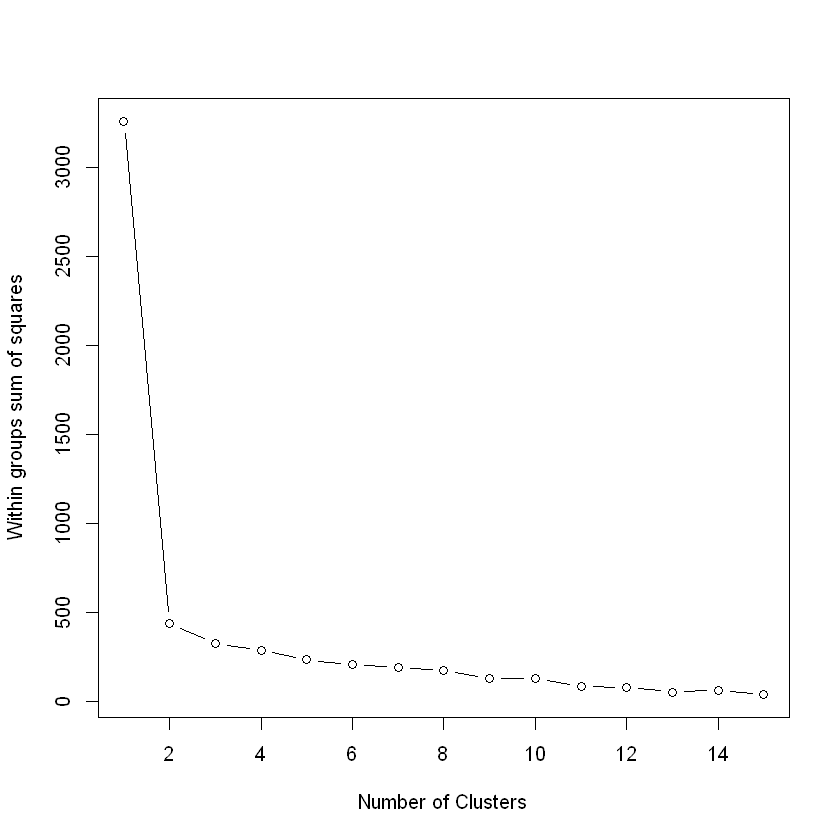

In [19]:

wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:15) wss[i] <- sum(kmeans(data_t,
                                       centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")

In [142]:
?apply

In [17]:
k=kmeans(data_t, 2, iter.max = 10, nstart = 1,
 algorithm = c("Hartigan-Wong", "Lloyd", "Forgy",
 "MacQueen"), trace=FALSE)

In [18]:
k

K-means clustering with 2 clusters of sizes 11, 9

Cluster means:
      [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
1 26.67045 26.97418 26.90318 26.84073 26.86355 26.61936 26.61936 26.81527
2 25.52411 25.99972 25.66639 25.66639 25.64228 25.64228 25.81911 25.79161
      [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
1 26.76686 26.86650 26.65336 26.93750 26.78977 27.45141 27.45705 26.74718
2 25.73967 25.82283 25.99283 25.96511 26.62833 27.22194 26.59000 25.54150
     [,17]    [,18]    [,19]    [,20]    [,21]    [,22]    [,23]    [,24]
1 26.51405 26.83786 26.45727 26.43450 26.43450 26.68723 26.36050 26.46855
2 25.18389 25.73922 24.99272 25.26728 25.37489 25.58000 24.92717 24.92717
     [,25]    [,26]    [,27]    [,28]    [,29]    [,30]    [,31]    [,32]
1 26.50827 26.41195 26.33241 26.49132 26.23005 26.51691 25.90886 26.27568
2 25.32611 25.32611 24.90967 25.61111 24.96522 25.40589 24.90617 25.35050
     [,33]    [,34]    [,35]    [,36]    [,37]

In [66]:
k$centers #Display&nbsp;cluster centers
table(k$cluster)

26.67045,26.97418,26.90318,26.84073,26.86355,26.61936,26.61936,26.81527,26.76686,26.86650,...,25.97414,25.74418,25.75545,25.76964,25.80373,25.78677,25.78677,25.82345,25.82345,25.85782
25.52411,25.99972,25.66639,25.66639,25.64228,25.64228,25.81911,25.79161,25.73967,25.82283,...,23.89217,23.89217,24.07272,24.07272,24.62139,24.62139,24.28806,24.28806,24.30222,24.30222



 1  2 
11  9 

In [136]:
k

K-means clustering with 2 clusters of sizes 2, 2

Cluster means:
     [,1]    [,2]    [,3]    [,4]    [,5]    [,6]    [,7]   [,8]    [,9]  [,10]
1 25.8435 26.5000 26.6870 26.7500 27.4065 27.5310 27.7185 27.250 27.5000 27.844
2 24.8440 25.7495 25.7185 25.9065 26.6560 27.3435 27.5000 27.031 27.3125 27.000
   [,11]   [,12]  [,13]   [,14]   [,15]  [,16]  [,17]   [,18]  [,19]   [,20]
1 27.937 27.9685 27.906 27.7815 27.9995 27.500 27.094 27.2185 26.656 27.2185
2 27.469 27.3750 27.656 27.3120 26.8435 26.156 25.375 25.4995 25.406 26.0310
    [,21]   [,22]   [,23]   [,24]   [,25]   [,26]  [,27]   [,28]   [,29]  [,30]
1 26.9995 27.3125 27.1875 26.8435 26.8125 27.0310 27.125 26.8745 26.6875 26.906
2 25.1875 25.5000 25.8435 25.1560 25.6875 24.6875 25.875 24.4690 25.7500 25.125
    [,31]   [,32]   [,33]   [,34]   [,35]   [,36]   [,37]  [,38]   [,39]  [,40]
1 26.6875 26.8125 27.1245 26.6875 26.3750 26.8120 26.6875 26.875 26.4685 26.906
2 25.3435 25.6560 25.6875 25.4685 25.6875 25.3745 25.5310 26.031

In [5]:
x=c(2,3,4,4)
y=c(3,4,7,8)

In [7]:
cor(x,y)

[1] 0.9506542

In [8]:
mat <- matrix(runif(5))
mat

0.2655087
0.3721239
0.5728534
0.9082078
0.2016819


In [12]:

mat <- matrix(runif(5))
fn <- function(x, y) 1 - cos(x - y)

proxy::dist(mat, method = fn)

            1           2           3           4
2 0.024084935                                    
3 0.119654797 0.037381593                        
4 0.006914433 0.056442160 0.181425203            
5 0.038874393 0.001789084 0.022908727 0.077933519

In [45]:
install.packages('Rtsne')

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpiiGSCS\downloaded_packages
